# Implementation and Analysis of Kmeans (Bonus Homework) 

---
#### Course: Computational Data Mining
#### Professor: Dr. Fatemeh Shakeri
#### Student: Ilya Khalafi
#### Student ID: 9913039
#### November 2023

# Table Of Contents
- [Introduction](#intro)
- [Dependencies](#dependency)
- [Challenges](#challenges)
  - [Vectorized Implementation of Kmeans](#implementation)
  - [Performance in the Presence of Outliers](#outlier)
  - [Performance on non-Convex Dataset](#nonconvex)

<a name="intro"></a>

# Introduction 📚

---

One of the simple, yet challenging problems in machine learning is clustering. It is simply the task of grouping data points into k different clusters, where dataset and k are given.

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering.png" width="400"/>

Clustering has several crucial applications, from data preprocessing to similarity analysis and anomality recognition; therefore, it has been studied seriously since first days of computer science and machine learning.

One of the simplest yet effective algorithms for clustering is Kmeans. In Kmeans, we consider k different points (one for each cluster) where each centroid represents its cluster, and every data point is considered to be in the cluster whose centroid has the least distance.

In this article, we implement and analyze the Kmeans algorithm. Specifically, we explore three different challenges: **Implementation**, **Sensitivity to Outliers**, **Performance on non-Convex Dataset**.

<a name="dependency"></a>

#Dependencies 🧰

---

We need the following libraries during this article:

- **numpy** : <br />
    numpy is a commonly used library for doing scientific computation. Unlike Python's default pointer structure, numpy saves variables in place and continuously on RAM and also provides sophisticated methods that use parallelism to make our computations much faster.

- **Matplotlib** : <br />
    Matplotlib is a well-known library in data science for visualization. We will use Matplotlib to demonstrate our results.

- **seaborn** : <br />
    seaborn is built on matplotlib and provides many chart templates for us so we don't need to draw and build every components of our charts with matplotlib.

- **scikit-learn (sklearn)** : <br />
    This library is a known data science library and we will import iris dataset from it and also some metric methods as well.

In [5]:
%%capture
# Python Standard Libraries
import random
# Fundamental Data Analysis & Visualization Tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
from sklearn import datasets

<a name="challenges"></a>

#Challenges

---

We will face and explore three different tasks:
- Vectorized Implementation of Kmeans
- Performance in the Presence of Outliers
- Performance on non-Convex Dataset

<a name="implementation"></a>

###Vectorized Implementation of Kmeans

---

We explained the procedure of the Kmeans algorithm earlier in this article, but one of the important features to consider for Kmeans is to implement it in a vectorized manner.

Inevitably, we implement each iteration of our algorithm using a for loop in Python. Still, in order to find distances and new centroids in each iteration, we use broadcasting in numpy. Assume that we have a mxn matrix where each column is a point of our dataset (n data points) and our data points have m dimensions. In each iteration, we make a mxnxk tensor where k is the number of our centroids (= number of clusters). Also, we have another matrix of size mxk where each column contains a centroid. Then, by subtracting the matrix of our centroids from the mxnxk tensor, numpy broadcasts and subtracts the vector of each centroid from a layer of our tensor. Therefore, we calculate distances and new clusters through numpy to boost our implementation.

In [2]:
def kmeans(pnts, k, norm=2, iters=100):
    '''
    pnts : numpy array of shape mxn where each column is a data point
    k : number of clusters
    norm : specific norm to measure distances (= 1, 2, np.inf, ...), we pass this arg to np.linalg.norm
    iters : number of iterations to apply the k-means algorithm
    '''
    # Initializing random centroids 
    centroids = pnts[np.random.choice(range(pnts.shape[0]), size=k, replace=False)]

    for _ in range(iters):
        # Computing pairwise distances between data points and centroids
        distances = np.linalg.norm(pnts[:, np.newaxis] - centroids, ord=norm, axis=2)

        # Assigning each data point to the closest centroid
        labels = np.argmin(distances, axis=1)

        # Updating the centroids by taking the mean of the data points assigned to each centroid
        new_centroids = np.array([np.mean(pnts[labels == i], axis=0) for i in range(k)])

        # Checking for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

Now, let's visualize and check the performace of our method...
We use the make_blobs data generator from the sklearn library. make_blobs generates clusters of data points that are linearly separable.

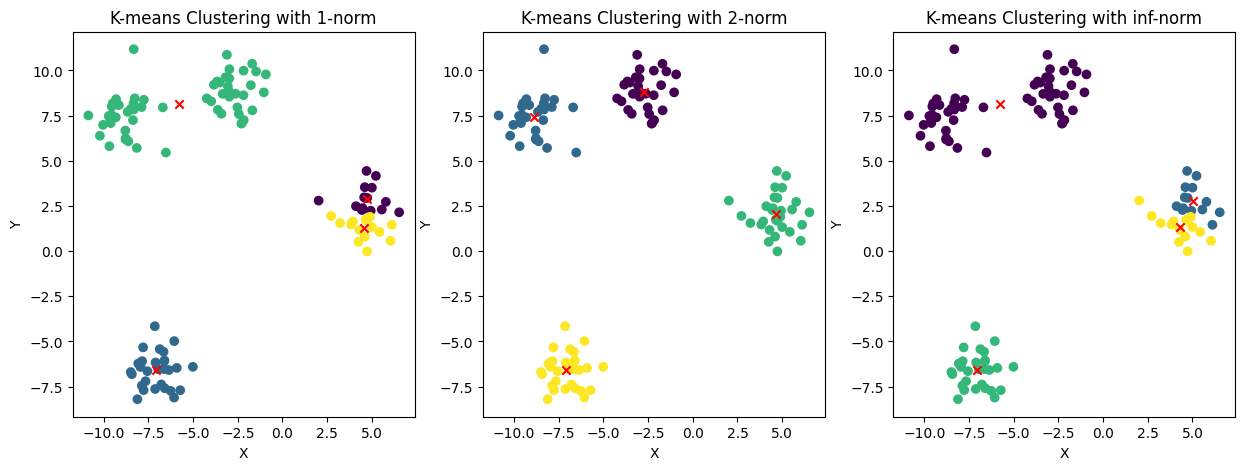

In [32]:
# Generate random data using make_blobs
X, y = datasets.make_blobs(n_samples=120, centers=4, random_state=42)

# We test Kmeans with different norms
norms = [1, 2, np.inf]

plt.figure(figsize=(15,5))
for i, norm in enumerate(norms):
    # Apply Kmeans algorithm
    centroids, labels = kmeans(X, k=4, norm=norm)

    # Visualize the data points and centroids
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.title(f"K-means Clustering with {norm}-norm")
    plt.xlabel("X")
    plt.ylabel("Y")

Firstly, you can see that our implement method works and it is very fast.
Secondly, you can see that Kmeans algorithm does not perform good enough for norm-1 and norm-inf even though we only generated 4 groups of data; therefore, from now on, we only use the Euclidean norm for Kmeans. Feel free to change the norm arg in our Kmeans method to test the results.

<a name="outliers"></a>

###Performance in the Presence of Outliers

---

One of the important challenges of clustering is to detect and neutralize outlier data points in our clustering. Lets check the performance of Kmeans for this challenge. We run Kmeans on a couple of different sets to measure its performance.

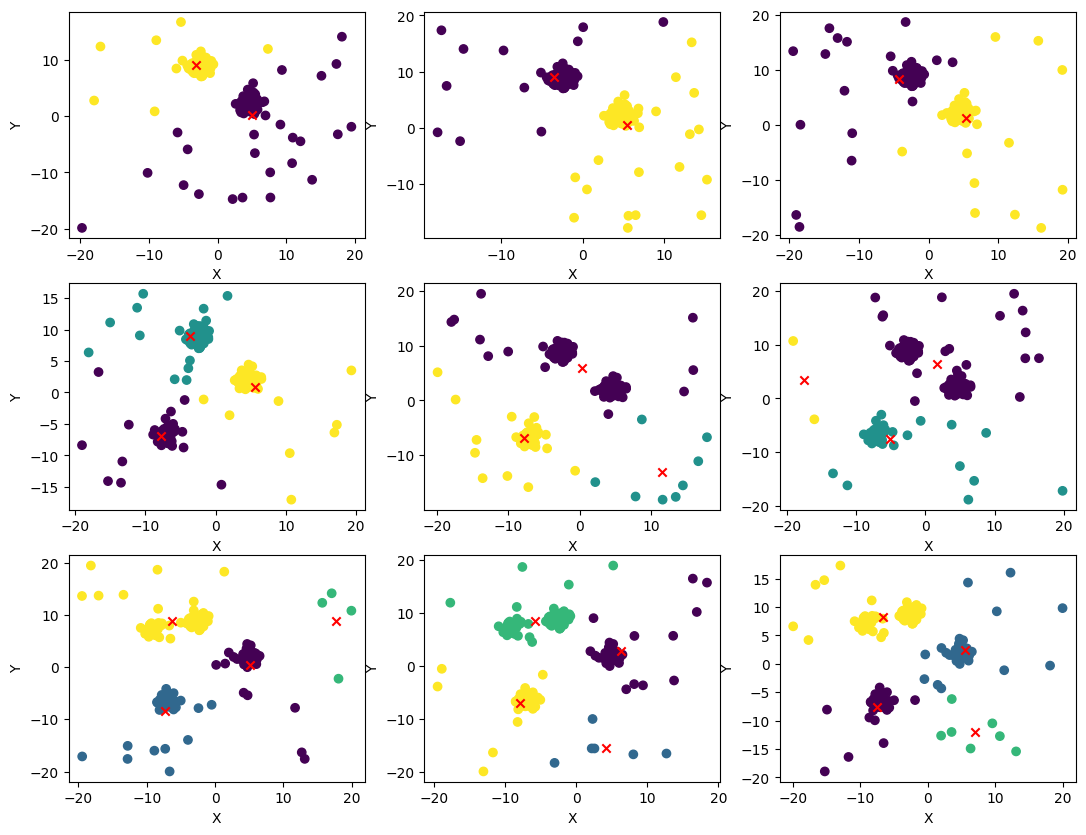

In [33]:
plt.figure(figsize=(13, 10))

# Repeating the experiment
for i in range(9):
    # Set k between 2 and 4
    k = int(i / 3) + 2
    
    # Generate random data using make_blobs
    X, y = datasets.make_blobs(n_samples=120, centers=k, random_state=42)

    # Add outliers to the data
    outliers = np.random.uniform(low=-20, high=20, size=(30, 2))
    X_with_outliers = np.vstack((X, outliers))

    # Apply Kmeans algorithm
    centroids, labels = kmeans(X_with_outliers, k=k)
    
    # Visualize the data points and centroids
    plt.subplot(3, 3, i+1)
    plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.xlabel("X")
    plt.ylabel("Y")

On the first row, we have k=2 different groups, one the second row we have k=3 groups of data points and finally we have k=4 group of data points on the third row of plots.

Our observation from the above plots tells us that the presence of outliers makes Kmeans algorithm very unstable, especially when we increase the number of clusters. You can see that the Kmeans algorithm still shows a reasonable performance when we only have 2 clusters of data points with outliers, but only 1/3 of its results are good when we have 4 clusters! Now imagine how it performs when we have many more groups.

I should mention that the Kmeans algorithm still can perform well on 4 or more clusters in the presence of outliers, but we have to repeat the method more than once, simply because Kmeans may fall in local minima; therefore, by running it several times with different starting centroids, we increase the chance of finding the global minima.

<a name="nonconvex"></a>

###Performance on non-Convex Dataset

---

Another crucial challenge in clustering is to detect the pattern of data points and correctly assign cluster to data points, specifically when data points are not linearly separable. Lets check the performance of Kmeans for this challenge.

We use the make_moons data generator from the sklearn library. It only generates two groups of data points, but it generates non-convex set of data points. We test the performance of Kmeans on output of this data generator using different norms.

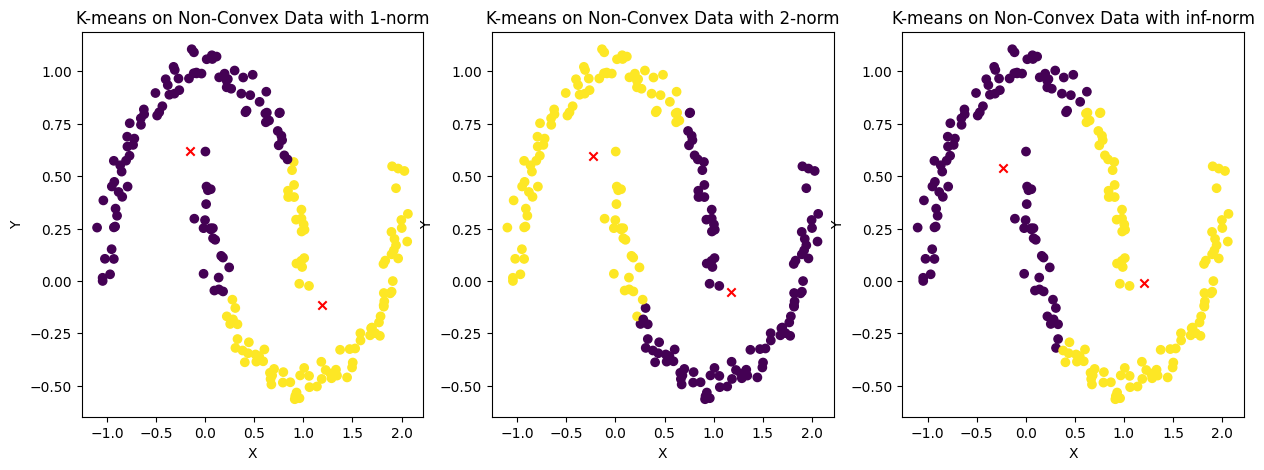

In [37]:
# Generate non-convex data using make_moons
X, y = sk.datasets.make_moons(n_samples=200, noise=0.05, random_state=42)

# We test KMeans with different norms
norms = [1, 2, np.inf]

plt.figure(figsize=(15,5))
for i, norm in enumerate(norms):
    # Apply k-means algorithm
    centroids, labels = kmeans(X, k=2, norm=norm)

    # Visualize the data points and centroids
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.title(f"K-means on Non-Convex Data with {norm}-norm")
    plt.xlabel("X")
    plt.ylabel("Y")

It is observable that the Kmeans algorithm cannot even differentiate two groups of data points regardless of the norm we specify for the distance. It is not surprising because we assign each data point the cluster of the closest centroid, therefore each cluster must be in a circle or globe around its centroid and Kmeans cannot detect rotations, twists and other nonlinear relations among data points of a cluster.


Thanks for your valuable time and attention! This notebook is available in the link below😀

https://drive.google.com/file/d/1EuHKheKVmpv5E3B3ELyVn6eaf_2eTnxC/view?usp=sharing